### Лабораторная №1
![Picture for task](https://sun9-28.userapi.com/c855228/v855228840/223cd9/Iyxz1WNXnf0.jpg)
***Вариант 4***
$$ Y=\sqrt{x}, a=1, b=5 $$

1. Параметры равномерного распределения:  
$$ m_{x} = \frac {a+b}{2}=3, ~ \sigma_{x} = \sqrt{\frac{(b-a)^2}{12}}=\frac {2\sqrt{3}}{3} $$
Выборка генерируется встроенной функцией `random()`, которая возвращает число из интервала `[0,1)`

In [401]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np
from math import sqrt

In [402]:
f = lambda x: sqrt(x)
a = 1
b = 5

In [403]:
n = int(input())

105


In [404]:
x = [a + (b - a) * random.uniform(0, 1) for _ in range(n)]
y = [round(f(val), 3) for val in x]

2. Вариационный ряд и эмпирическая функция

In [405]:
var_series = sorted(y)
count = [y.count(val) for val in y]

table = pd.DataFrame(
    {
        'y_i': var_series,
        'n_i': count
    }
)
print("Вариационный ряд")
table

Вариационный ряд


,y_i,n_i
0,1.001,1
1,1.006,1
2,1.035,1
3,1.035,1
4,1.044,1
...,...,...
100,2.210,1
101,2.210,1
102,2.216,1
103,2.216,1


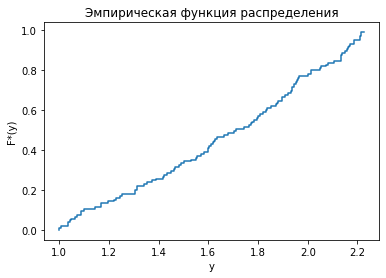

In [406]:
# эмпирическая функция распределения: count(X < x0) / count(X)
F = lambda X, x0: float(len([num for num in X if num < x0])) / float(len(X))

plt.step(var_series, [F(y, y0) for y0 in var_series])
plt.xlabel('y')
plt.ylabel('F*(y)')
plt.title("Эмпирическая функция распределения")
plt.show()

3. Теоретическая функция распределения $ G(Y) $


$$ f(x) = \begin{cases}
\frac {1}{4}, x \in [1,5], \\
0, x \notin [1,5] \\
\end{cases}
$$
$$ y = \phi(x)= \sqrt {x}$$
$$x=\psi(y)= y^2$$
$$ |\psi'(y)| = 2y $$
$$ g(y) = \phi(y)=f(\psi(y))|\psi'(y)| $$
$$ g(y)= \frac {y}{2}, y \in [1, \sqrt{5}] $$
$$ G(y) = \begin{cases}
0, y < 0, \\
\frac {y^2}{4} - \frac{1}{4}, y \in [1,\sqrt{5}],\\
1, y > \sqrt{5} \\
\end{cases}
$$



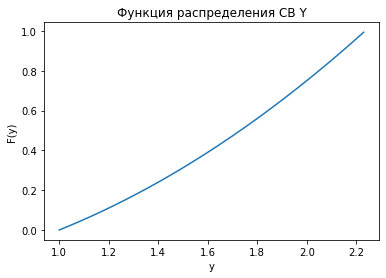

In [407]:
Y = lambda y: y ** 2 / 4 - 0.25
u = np.arange(1, sqrt(5), 0.01)
plt.plot(u, [Y(val) for val in u]) 
plt.xlabel('y')
plt.ylabel('F(y)')
plt.title("Функция распределения СВ Y")
plt.show()

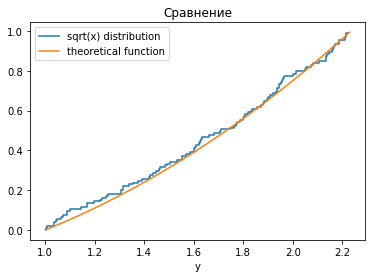

In [408]:
plt.step(var_series, [F(y, y0) for y0 in var_series], label="sqrt(x) distribution")
plt.plot(u, [Y(val) for val in u], label="theoretical function")
plt.legend(loc="best")
plt.xlabel('y')
plt.title('Сравнение')
plt.show()

### Лабораторная №2
![Picture for task](https://sun9-63.userapi.com/c855228/v855228840/223cec/DRLn0wFGFEE.jpg)

**Задание 2**  
*Равноинтервальный метод*

In [409]:
if n <= 100:
    M = int(sqrt(n))
else:
    M = int(4 * np.log10(n))
    
h = round((var_series[-1] - var_series[0]) / M, 4)
print(f'M={M}, h={h}')

M=8, h=0.153


In [410]:
A_i = [round(var_series[0] + (i - 1) * h, 3) for i in range(1, M+2)]
a = A_i[:-1]
b = A_i[1:] 
intervals = list(zip(a, b))
print(a)
print(b)
print(f"invervals: {intervals}")

[1.001, 1.154, 1.307, 1.46, 1.613, 1.766, 1.919, 2.072]
[1.154, 1.307, 1.46, 1.613, 1.766, 1.919, 2.072, 2.225]
invervals: [(1.001, 1.154), (1.154, 1.307), (1.307, 1.46), (1.46, 1.613), (1.613, 1.766), (1.766, 1.919), (1.919, 2.072), (2.072, 2.225)]


In [411]:
m_i = np.zeros(M)
num_interval = 0
i = 0
for val in var_series:
    if val >= intervals[num_interval][0] and val <= intervals[num_interval][1]:
        m_i[num_interval] += 1
        continue
    num_interval += 1
    m_i[num_interval] +=1
        
print(f'кол-во точек в интервалах: {m_i}')

кол-во точек в интервалах: [12.  9. 10. 14. 10. 16. 15. 19.]


In [412]:
#средняя плотность вероятности для каждого интервала
f = [round(m_i[i] / (n * h), 4) for i in range(M)]
print(f)

[0.747, 0.5602, 0.6225, 0.8715, 0.6225, 0.996, 0.9337, 1.1827]


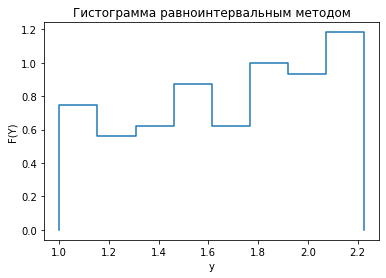

In [413]:
x = [intervals[0][0]]
y = [0]
for i in range(M):
    x.append(intervals[i][0])
    x.append(intervals[i][1])
    y.append(f[i])
    y.append(f[i])
x.append(intervals[M-1][1])
y.append(0)
 
plt.plot(x, y)
plt.title("Гистограмма равноинтервальным методом")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

[1.0775, 1.2305, 1.3835, 1.5365, 1.6895, 1.8425, 1.9955, 2.1485]


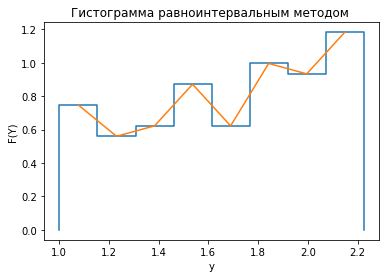

In [414]:
z = [round(intervals[i][0] + (intervals[i][1] - intervals[i][0]) / 2, 5)  for i in range(M)]
print(z)

plt.plot(x, y)
plt.plot(z, f)
plt.title("Гистограмма равноинтервальным методом ")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

In [415]:
empiric_func = []
sum = 0
for i in m_i:
    empiric_func.append(sum / n)
    sum += i
empiric_func.append(1)
print(f'empirical function: {empiric_func}')

empirical function: [0.0, 0.11428571428571428, 0.2, 0.29523809523809524, 0.42857142857142855, 0.5238095238095238, 0.6761904761904762, 0.819047619047619, 1]


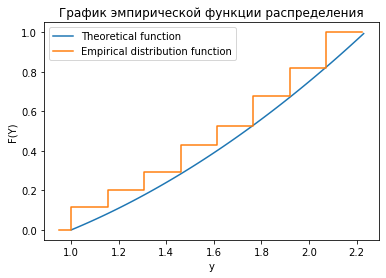

In [416]:
x = [0.95, 1, 1]
y = [0, 0, empiric_func[1]]
del empiric_func[0]

for i in range(M):
    x.append(intervals[i][0])
    x.append(intervals[i][1])
    y.append(empiric_func[i])
    y.append(empiric_func[i])
x.append(intervals[M-1][1])
y.append(1)

Y = lambda y: y ** 2 / 4 - 0.25
u = np.arange(1, sqrt(5), 0.01)
plt.plot(u, [Y(val) for val in u], label="Theoretical function") 
plt.plot(x, y, label='Empirical distribution function')
plt.legend(loc="best")
plt.title("График эмпирической функции распределения")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

In [417]:
t = pd.DataFrame(
    {
        'interval': intervals,
        'm_i': m_i,
        'h_i': h,
        'f_i': f
    }
)
t

,interval,m_i,h_i,f_i
0,"(1.001, 1.154)",12.0,0.153,0.7470
1,"(1.154, 1.307)",9.0,0.153,0.5602
2,"(1.307, 1.46)",10.0,0.153,0.6225
3,"(1.46, 1.613)",14.0,0.153,0.8715
4,"(1.613, 1.766)",10.0,0.153,0.6225
5,"(1.766, 1.919)",16.0,0.153,0.9960
6,"(1.919, 2.072)",15.0,0.153,0.9337
7,"(2.072, 2.225)",19.0,0.153,1.1827


In [418]:
Y = lambda y: y / 2
u = np.arange(1, sqrt(5), 0.01)

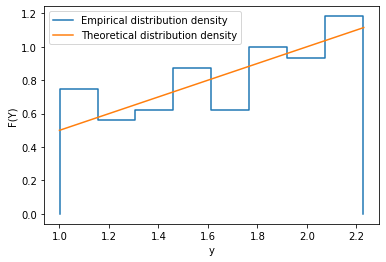

In [419]:
x = [intervals[0][0]]
y = [0]
for i in range(M):
    x.append(intervals[i][0])
    x.append(intervals[i][1])
    y.append(f[i])
    y.append(f[i])
x.append(intervals[M-1][1])
y.append(0)
 
plt.plot(x, y, label='Empirical distribution density')
plt.plot(u, [Y(val) for val in u], label='Theoretical distribution density')
plt.legend(loc="best")
plt.xlabel("y")
plt.ylabel("F(Y)")
plt.show()

![Picture for task](https://sun9-60.userapi.com/c857024/v857024004/146015/GVe2lpcHi24.jpg)

In [421]:
m_i = n // M
print(m_i)

13
